In [44]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import LinearSVC


In [3]:
from google.colab import files
uploaded = files.upload()

Saving training.1600000.processed.noemoticon.csv to training.1600000.processed.noemoticon.csv


In [32]:
cols = ['target', 'ids', 'date', 'flag', 'user', 'text']
df = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding='latin-1', names=cols)
df.head()


,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [33]:
print(df.columns)

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')


In [34]:
# cleaning the dataset
def clean_text(t):
    t = t.lower()          # Lowercase
    t = re.sub(r'http\S+|www\S+|https\S+', '', t)  # Remove URLs
    t = re.sub(r'@\w+', '', t)            # Remove @mentions
    t = re.sub(r'#', '', t)               # Remove hashtag symbol, keep word
    t = re.sub(r'[^\w\s]', '', t)         # Remove special characters
    t = re.sub(r'\d+', '', t)             # Remove numbers
    return t.strip()

df['cleaned_text'] = df['text'].apply(clean_text)
df.head()


,target,ids,date,flag,user,text,cleaned_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",a thats a bummer you shoulda got david carr o...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...


In [52]:
#Label mapping
df.rename(columns={df.columns[0]: 'sentiment'}, inplace=True)

label_map = {0: "Negative", 2: "Neutral", 4: "Positive"}
df['sentiment_str'] = df['sentiment'].map(label_map)

print(df['sentiment_str'].value_counts())




sentiment_str
Negative    800000
Positive    800000
Name: count, dtype: int64


In [53]:

str_to_num = {"Negative": -1, "Neutral": 0, "Positive": 1}
df['sentiment_label'] = df['sentiment_str'].map(str_to_num)

print(df['sentiment_label'].value_counts())

sentiment_label
-1    800000
 1    800000
Name: count, dtype: int64


In [37]:
df.head()

,sentiment,ids,date,flag,user,text,cleaned_text,sentiment_str,sentiment_label
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",a thats a bummer you shoulda got david carr o...,Negative,-1
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,Negative,-1
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...,Negative,-1
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,Negative,-1
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...,Negative,-1


In [41]:
# feature extraction
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf = tfidf.fit_transform(df['cleaned_text'])
print("TF-IDF shape:", X_tfidf.shape)
X = X_tfidf
y = df['sentiment_str']


TF-IDF shape: (1600000, 5000)


In [42]:
# spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# training SVM
model = LinearSVC()
model.fit(X_train, y_train)

LinearSVC()


 Accuracy: 0.765028125


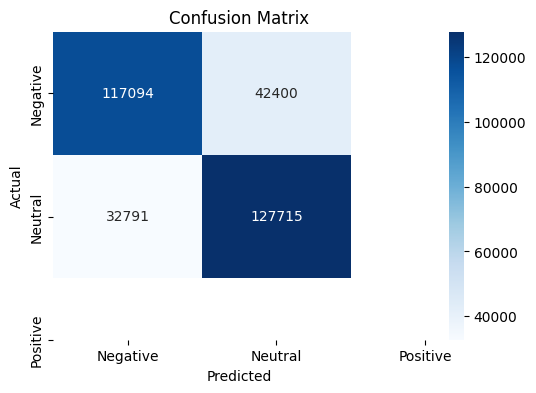

In [48]:
# evaluate
y_pred = model.predict(X_test)

print("\n Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [51]:
print("Unique in y_test:", y_test.unique())
print("Unique in y_pred:", np.unique(y_pred))

Unique in y_test: ['Negative' 'Positive']
Unique in y_pred: ['Negative' 'Positive']


In [49]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

Classification Report:
              precision    recall  f1-score   support

    Negative       0.78      0.73      0.76    159494
    Positive       0.75      0.80      0.77    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.76      0.76    320000
weighted avg       0.77      0.77      0.76    320000



A short write-up:

Which model you chose and why:  SVM

I went with an SVM model using LinearSVC because it's simple, fast, and generally performs well on text classification tasks like this one.

How TF-IDF helped capture important features:

To turn the tweets into something the model could understand, I used TF-IDF. It helps highlight words that actually matter for sentiment (like “happy”, “hate”, etc.) while ignoring common ones like “the” or “is”.

Challenges faced and how you solved them:

The dataset was huge, and at first, it kept crashing the runtime.

 I also ran into errors with the TF-IDF step, some tweets were just empty. Removing those fixed the problem.



